In [4]:

import polars as pl
from datetime import datetime

In [5]:
df = pl.read_csv("data/df_with_category.csv")


In [8]:
df

create_ts,ticker_name,contracts_traded,price,category
str,str,i64,i64,str
"""2025-01-01 23:59:27-05:00""","""KXINAUG-25-MZ""",29,47,"""US Politics"""
"""2025-01-01 23:59:27-05:00""","""KXINAUG-25-MZ""",25,47,"""US Politics"""
"""2025-01-01 23:59:27-05:00""","""KXINAUG-25-MZ""",50,47,"""US Politics"""
"""2025-01-01 23:59:27-05:00""","""CABINETTULSI-25-FEB01""",10,91,null
"""2025-01-01 23:59:25-05:00""","""KXSNOWNYM-25JAN-T8.0""",222,21,"""Weather"""
…,…,…,…,…
"""2025-08-12 00:00:02-04:00""","""KXWTAMATCH-25AUG11RYBMER-RYB""",22,53,"""Sports"""
"""2025-08-12 00:00:02-04:00""","""KXFEDDECISION-25SEP-H0""",1100,20,"""Macroeconomics"""
"""2025-08-12 00:00:01-04:00""","""KXCPI-25JUL-T0.2""",163,52,"""Macroeconomics"""


In [9]:
cat_wise = df.group_by('category').agg(pl.col('contracts_traded').sum()).sort('contracts_traded', descending=True)


3735468352

In [17]:
cat_wise['contracts_traded'][0]/cat_wise['contracts_traded'].sum()

0.692842181788079

In [4]:
df = df.with_columns([
    pl.col('create_ts').str.to_datetime().alias("parsed_ts")
])

In [5]:
monthly_analysis = (
    df
    .with_columns([
        # Extract year-month for grouping
        pl.col("parsed_ts").dt.truncate("1mo").alias("month")
    ])
    .group_by(["month", "category"])
    .agg([
        pl.col("contracts_traded").sum().alias("category_volume"),
        pl.count().alias("trade_count")
    ])
)


/var/folders/09/fwj9ml5j17z0dlwbz1b4vwph0000gn/T/ipykernel_39158/3550471803.py:10: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("trade_count")


In [6]:
monthly_analysis

month,category,category_volume,trade_count
"datetime[μs, UTC]",str,i64,u32
2025-08-01 00:00:00 UTC,"""Finance""",7284207,44617
2025-04-01 00:00:00 UTC,"""Weather""",617806,9466
2025-06-01 00:00:00 UTC,null,4496842,59217
2025-06-01 00:00:00 UTC,"""Sports""",631305022,1961290
2025-02-01 00:00:00 UTC,"""Pop Culture""",21773942,249450
…,…,…,…
2025-07-01 00:00:00 UTC,"""Temperature""",12026002,234827
2025-03-01 00:00:00 UTC,"""Macroeconomics""",7336357,53383
2025-08-01 00:00:00 UTC,"""Pop Culture""",4779741,41745


In [7]:
monthly_totals = (
    monthly_analysis
    .group_by("month")
    .agg([
        pl.col("category_volume").sum().alias("month_total_volume")
    ])
)

In [8]:
monthly_totals

month,month_total_volume
"datetime[μs, UTC]",i64
2025-03-01 00:00:00 UTC,513106674
2025-01-01 00:00:00 UTC,163794962
2025-08-01 00:00:00 UTC,252817590
2025-06-01 00:00:00 UTC,792124144
2025-04-01 00:00:00 UTC,453241714
2025-02-01 00:00:00 UTC,165962441
2025-07-01 00:00:00 UTC,740539131
2025-05-01 00:00:00 UTC,653881696


In [9]:
monthly_volume_pct = (
    monthly_analysis
    .join(monthly_totals, on="month")
    .with_columns([
        (pl.col("category_volume") / pl.col("month_total_volume") * 100)
        .round(2)
        .alias("volume_percentage")
    ])
    .select([
        "month", 
        "category", 
        "category_volume", 
        "volume_percentage",
        "trade_count",
        "month_total_volume"
    ])
    .sort(["month", "category"])
)

In [10]:
monthly_volume_pct

month,category,category_volume,volume_percentage,trade_count,month_total_volume
"datetime[μs, UTC]",str,i64,f64,u32,i64
2025-01-01 00:00:00 UTC,null,11995749,7.32,80623,163794962
2025-01-01 00:00:00 UTC,"""Crypto""",29386592,17.94,401451,163794962
2025-01-01 00:00:00 UTC,"""Finance""",5048518,3.08,24608,163794962
2025-01-01 00:00:00 UTC,"""Global Politics""",2001419,1.22,13341,163794962
2025-01-01 00:00:00 UTC,"""Macroeconomics""",3781036,2.31,16395,163794962
…,…,…,…,…,…
2025-08-01 00:00:00 UTC,"""Pop Culture""",4779741,1.89,41745,252817590
2025-08-01 00:00:00 UTC,"""Sports""",169495856,67.04,747358,252817590
2025-08-01 00:00:00 UTC,"""Temperature""",4955938,1.96,81782,252817590


In [11]:
volume_pct_pivot = (
    monthly_volume_pct
    .select(["month", "category", "volume_percentage"])
    .pivot(
        values="volume_percentage", 
        index="month", 
        columns="category"
    )
    .fill_null(0)
)

/var/folders/09/fwj9ml5j17z0dlwbz1b4vwph0000gn/T/ipykernel_39158/2894943215.py:2: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  monthly_volume_pct


In [22]:
data = volume_pct_pivot.to_pandas()
data = data.rename(columns={'null': 'Uncategorized'})
data = data[:-1]

In [46]:
data = data.rename(columns={'Crypto': 'Crypto Prices'})

Categories sorted by average percentage:
1. Sports: 57.46%
2. US Politics: 11.24%
3. Crypto Prices: 9.76%
4. Macroeconomics: 5.72%
5. Temperature: 4.41%
6. Pop Culture: 4.36%
7. Finance: 3.01%
8. Uncategorized: 1.90%
9. Global Politics: 1.66%
10. Weather: 0.48%

Sports gets color: #FFD93D


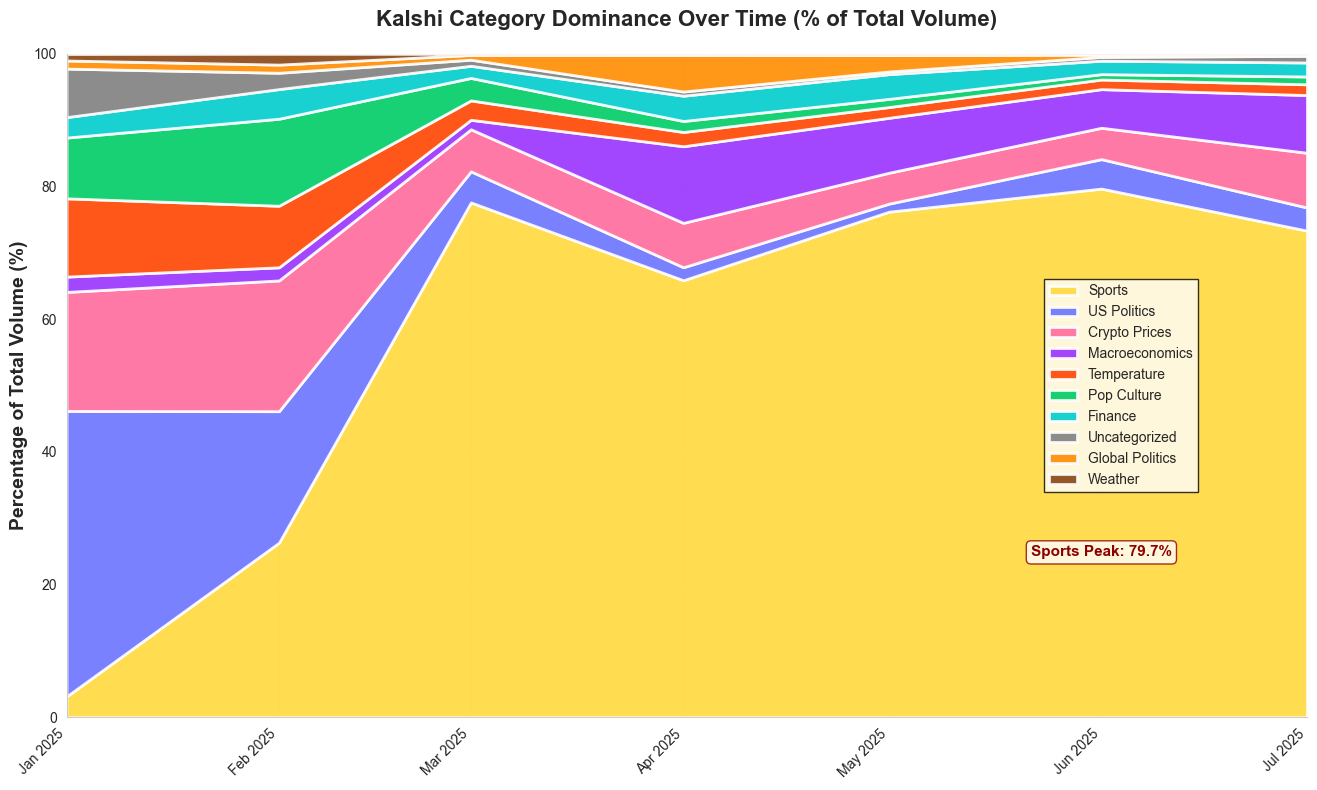

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
# Add import for path effects at the top
import matplotlib.patheffects as path_effects

# Set seaborn style for clean look
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Convert month to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(data['month']):
    data['month'] = pd.to_datetime(data['month'])

# Sort by month
data = data.sort_values('month')

# Get category columns and calculate averages
categories = [col for col in data.columns if col != 'month']
category_averages = {cat: data[cat].mean() for cat in categories}

# Sort categories by average percentage (descending order)
categories_sorted = sorted(categories, key=lambda x: category_averages[x], reverse=True)

# Print the sorted order
print("Categories sorted by average percentage:")
for i, cat in enumerate(categories_sorted):
    print(f"{i+1}. {cat}: {category_averages[cat]:.2f}%")

# Force Sports to get yellow and be at bottom (highest dominance)
# Define very distinct colors - no similar shades
distinct_colors = {
    'Sports': '#FFD93D',           # Bright yellow
    'US Politics': '#6B73FF',     # Blue  
    'Crypto Prices': '#FF6B9D',          # Pink
    'Pop Culture': '#00CC66',     # Bright green
    'Temperature': '#FF4500',     # Orange red
    'Macroeconomics': '#9933FF',  # Purple
    'Finance': '#00CCCC',         # Cyan
    'Global Politics': '#FF8C00', # Dark orange
    'Uncategorized': '#808080',   # Gray
    'Weather': '#8B4513'          # Brown
}

# Assign colors ensuring maximum distinction
colors = {}
for cat in categories_sorted:
    if cat in distinct_colors:
        colors[cat] = distinct_colors[cat]
    else:
        colors[cat] = '#CCCCCC'  # Default for any missing categories

print(f"\nSports gets color: {colors.get('Sports', 'Not found')}")

# Force Sports to be first (bottom of stack) regardless of average
if 'Sports' in categories_sorted:
    categories_sorted.remove('Sports')
categories_sorted = ['Sports'] + categories_sorted

# Create stacked area plot with border effects
x = data['month']
y_stack = np.zeros(len(data))

for category in categories_sorted:  # Plot in order, not reversed
    y_values = data[category].values
    
    # Plot the area with border effects
    ax.fill_between(x, y_stack, y_stack + y_values, 
                   color=colors[category], 
                   alpha=0.9, 
                   label=category,
                   edgecolor='white',
                   linewidth=2.0)
    
    y_stack += y_values

# Customize the plot
ax.set_xlim(data['month'].min(), data['month'].max())
ax.set_ylim(0, 100)

# Format x-axis to show all month names from the actual data
month_labels = [date.strftime('%b %Y') for date in data['month']]
ax.set_xticks(data['month'])
ax.set_xticklabels(month_labels, rotation=45, ha='right')

# Clean styling like your reference
# ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage of Total Volume (%)', fontsize=14, fontweight='bold')
ax.set_title('Kalshi Category Dominance Over Time (% of Total Volume)', 
             fontsize=16, fontweight='bold', pad=20)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

# Clean grid
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Legend positioned in the center-right of the plot area like your reference
legend = ax.legend(bbox_to_anchor=(0.85, 0.5), loc='center', 
                  fontsize=10, frameon=True, fancybox=False, 
                  edgecolor='black', facecolor='white')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.82)

# Add annotation for Sports peak
if 'Sports' in data.columns:
    max_sports_idx = data['Sports'].idxmax()
    max_sports_month = data.loc[max_sports_idx, 'month']
    max_sports_value = data.loc[max_sports_idx, 'Sports']
    
    ax.annotate(f'Sports Peak: {max_sports_value:.1f}%', 
                xy=(max_sports_month, max_sports_value/2), 
                xytext=(max_sports_month, max_sports_value/2 - 15),
                ha='center', va='center',
                fontsize=11, fontweight='bold', 
                color='darkred',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='darkred', alpha=0.8))

plt.show()

# Optional: Save with high quality
# plt.savefig('kalshi_category_dominance_clean.png', dpi=300, bbox_inches='tight', 
#             facecolor='white', edgecolor='none')

In [48]:
poly_markets = pd.read_csv('markets.csv')

/var/folders/09/fwj9ml5j17z0dlwbz1b4vwph0000gn/T/ipykernel_39158/4168029545.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  poly_markets = pd.read_csv('markets.csv')


In [51]:
poly_markets['createdAt'] = pd.to_datetime(poly_markets['createdAt'], format='mixed')

In [55]:
sel_markets = poly_markets[poly_markets['createdAt'] >= '2025-01-01']